# Escalamiento de datos númericos

###  Transformaciones lineales

In [2]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

Detalles del dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html 


(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

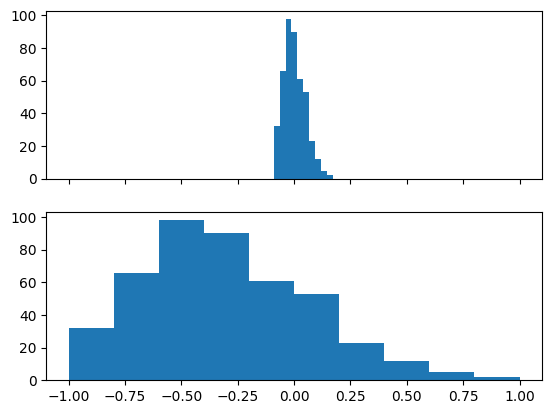

In [3]:
# reglas de escalamiento min - max 
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw) / (max_raw - min_raw)

fig, axs = plt.subplots(2, 1, sharex = True)

axs[0].hist(raw)
axs[1].hist(scaled)

In [4]:
# modelos para entrenamiento

def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [5]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled, number = 100)
print('train_raw: {}'.format(raw_time))
print('train_scaled: {}'.format(scaled_time))

train_raw: 0.043649847000097
train_scaled: 0.03250721600011275


- max-min scaling: mejor para datos uniformemente distribuidos
- z-score scaling: mejor para datos distrbuidos normalmente (campana de Gauss)

(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

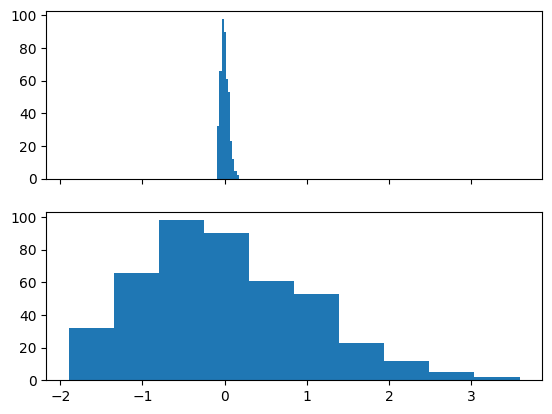

In [9]:
# escalamiento z

media = raw.mean()
desv_std = raw.std()
z_scaled = (raw - media)/desv_std

fig, axs = plt.subplots(2, 1, sharex = True)

axs[0].hist(raw)
axs[1].hist(z_scaled)

In [10]:
z_scaled.mean()

-2.813234813529808e-17

In [11]:
z_scaled.std()

1.0

In [12]:
# modelos para entrenamiento

def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

In [13]:
raw_time = timeit.timeit(train_raw, number = 100)
z_scaled_time = timeit.timeit(train_scaled, number = 100)
print('train_raw: {}'.format(raw_time))
print('train_scaled: {}'.format(z_scaled_time))

train_raw: 0.04423285099983332
train_scaled: 0.03564446099971974


Utilidades de Scikit Learn: http://scikit-learn.org/stable/modules/preprocessing.html

### Transformaciones no lineales

In [6]:
import os

# Verify if the code is run as an script or in an interactive environment
# Get the current directory

if '__file__' in globals():
    current_dir = os.path.dirname(__file__)
else:
    current_dir = os.getcwd()

csv_path = os.path.join(current_dir, "datasets", "cars.csv")

csv_path

df = pd.read_csv(csv_path)

df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
